In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

AMD Ryzen 5 5600G 4.46GHz

Intel N100 

Text(0.5, 0, 'Generation')

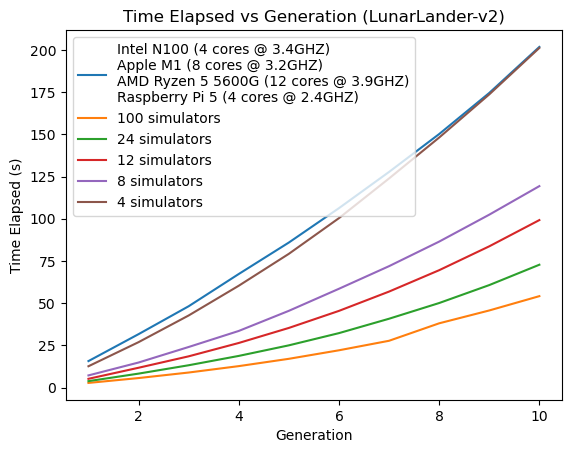

In [3]:
df_100 = pd.read_csv("lunar_lander_100_envs.csv")
df_24 = pd.read_csv("lunar_lander_24_envs.csv")
df_12 = pd.read_csv("lunar_lander_12_envs.csv")
df_8 = pd.read_csv("lunar_lander_8_envs.csv")
df_4 = pd.read_csv("lunar_lander_4_envs.csv")
df_all = pd.read_csv("lunar_lander_all_hosts.csv")
plt.plot(df_all['generation'], df_all['time_elapsed'], label='Intel N100 (4 cores @ 3.4GHZ)\nApple M1 (8 cores @ 3.2GHZ)\nAMD Ryzen 5 5600G (12 cores @ 3.9GHZ)\nRaspberry Pi 5 (4 cores @ 2.4GHZ)')
plt.plot(df_100['generation'], df_100['time_elapsed'], label='100 simulators')
plt.plot(df_24['generation'], df_24['time_elapsed'], label='24 simulators')
plt.plot(df_12['generation'], df_12['time_elapsed'], label='12 simulators')
plt.plot(df_8['generation'], df_8['time_elapsed'], label='8 simulators')
plt.plot(df_4['generation'], df_4['time_elapsed'], label='4 simulators')
plt.legend()
plt.title("Time Elapsed vs Generation (LunarLander-v2)")
plt.ylabel("Time Elapsed (s)")
plt.xlabel("Generation")

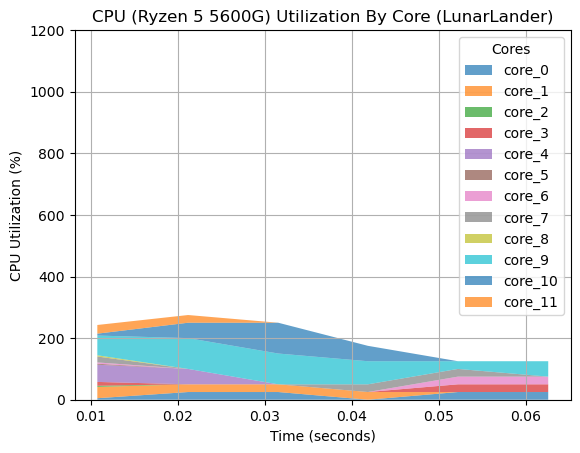

In [57]:
# Load the CSV file into a DataFrame
df = pd.read_csv('benchmarking/cpu_utilization.csv')

# Apply smoothing to the data
window_size = 2  # Number of points to average in moving average
df_smooth = df.copy()

# Apply moving average to each core's data
for column in df.columns[1:]:  # Skip the 'time' column
    df_smooth[column] = df[column].rolling(window=window_size, center=False).mean()

plt.ylim(0, 1200)

# Generate the stacked area plot
plt.stackplot(df_smooth['time'], 
              [df_smooth[column] for column in df_smooth.columns[1:]], 
              labels=df_smooth.columns[1:], 
              alpha=0.7)

plt.xlabel('Time (seconds)')
plt.ylabel('CPU Utilization (%)')
plt.title('CPU (Ryzen 5 5600G) Utilization By Core (LunarLander)')
plt.legend(title='Cores')
plt.grid(True)
plt.show()



In [5]:
ip = "192.168.4.203"
duckdb.sql("INSTALL postgres;")
duckdb.sql("LOAD postgres;")
duckdb.sql(f"ATTACH 'dbname=postgres user=postgres host={ip} password=template!PWD' AS db (TYPE POSTGRES);")


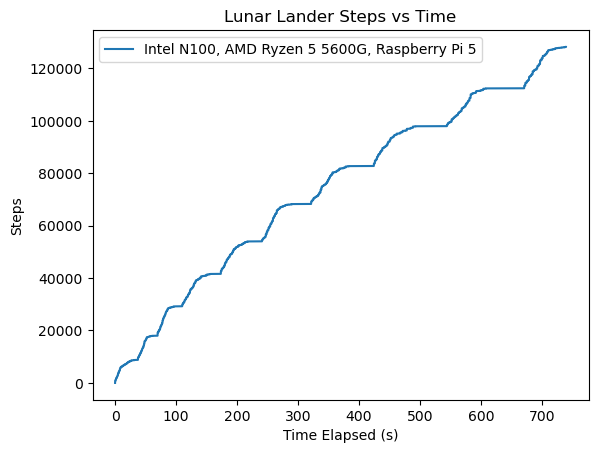

In [122]:
df = duckdb.query("""
SELECT time, COUNT(*) OVER (ORDER BY time ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as num_steps
FROM db.public.training
ORDER BY time
""").df()

df['elapsed_time'] = df['time'] - df['time'].min()

plt.plot(df['elapsed_time'], df['num_steps'], label='Intel N100, AMD Ryzen 5 5600G, Raspberry Pi 5')

plt.ylabel('Steps')
plt.xlabel('Time Elapsed (s)')
plt.title("Lunar Lander Steps vs Time")
plt.legend()

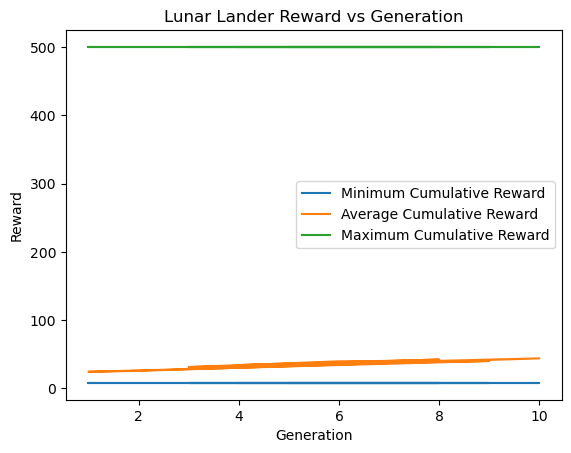

In [116]:

df = duckdb.query("""
WITH cumulative_reward AS
(
    SELECT generation, SUM(reward) AS cumulative_reward
    FROM db.public.training
    GROUP BY generation, team_id
)
SELECT generation, MIN(cumulative_reward) AS min_cumulative_reward, AVG(cumulative_reward) AS avg_cumulative_reward, MAX(cumulative_reward) AS max_cumulative_reward FROM cumulative_reward
GROUP BY generation

""").df()


plt.plot(df['generation'], df['min_cumulative_reward'], label="Minimum Cumulative Reward")
plt.plot(df['generation'], df['avg_cumulative_reward'], label="Average Cumulative Reward")
plt.plot(df['generation'], df['max_cumulative_reward'], label="Maximum Cumulative Reward")

#plt.plot(df[')
plt.ylabel('Reward')
plt.xlabel('Generation')
plt.title("Lunar Lander Reward vs Generation")
plt.legend()
